In [ ]:
sweep_ids = ['g1aqz63h', 'otphs2zh', 
             's45fguzh', '1cesj6eh']
config_names = ['tl_fast1', 'tl_fast1', 
                'tl_best5', 'tl_best5']

In [ ]:
import pandas as pd
import wandb
api = wandb.Api()

In [ ]:
metric = 'f1_score'

In [ ]:
names, configs, f1_scores = [], [], []
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append(config_names[i])
        f1_scores.append(run.summary[metric])

In [ ]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
f1_scores += list(pd.read_csv('logs/04_baseline_scratch_corrected_f1.csv')['f1_score'])[::-1]
sweep_id = "bk150cyb"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
    f1_scores.append(run.summary[metric])

In [ ]:
f1_df = pd.DataFrame(list(zip(configs[::-1], names[::-1], f1_scores[::-1])), columns=['config', 'name', metric])
f1_df.tail()

,config,name,f1_score
25,tl_fast1,devout-sweep-1,0.976330
26,tl_fast1,curious-sweep-2,0.975395
27,tl_fast1,trim-sweep-3,0.979741
28,tl_fast1,ethereal-sweep-4,0.980595
29,tl_fast1,swift-sweep-5,0.979934


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns_colours = sns.color_palette()
sns_colours[1], sns_colours[5] = sns_colours[5], sns_colours[1]
sns_colours[5], sns_colours[7] = sns_colours[7], sns_colours[5]

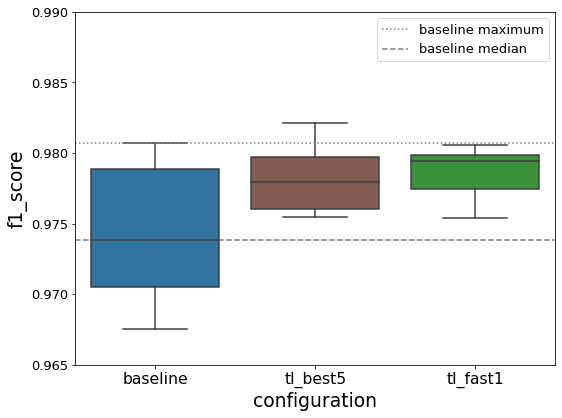

In [ ]:
plt.rc('font', size=13)

fig = plt.figure(figsize=(8, 6))
sns.boxplot(x='config', y=metric, data=f1_df, order=sorted(f1_df['config'].unique()), palette=sns_colours)
plt.ylim([0.965, 0.99])
plt.hlines(0.980712, -0.5, 2.5, linestyles='dotted', color='grey', label='baseline maximum')
plt.hlines(0.973796, -0.5, 2.5, linestyles='dashed', color='grey', label='baseline median')

ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='x-large')
ax.set_xlabel("configuration", size='x-large')
plt.xticks(fontsize='large')
plt.legend()
#ax.set_xticks([])
fig.tight_layout()

#fig.savefig('../figs/glitches/15_baseline_best5_fast1.png', dpi=600)